In [101]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from math import ceil

In [102]:
def plot_series(data, x_lab, y_lab, title, file_name, loc, scatter=False, grid=False):
  fig = matplotlib.pyplot.gcf()
  fig.set_size_inches(18.5, 8, forward=True)

  for d in data:
    if scatter:
      plt.scatter(d[0], d[1], alpha=0.8, label=d[2])
    else:
      plt.plot(d[0], d[1], alpha=0.8, label=d[2])

  plt.xlabel(x_lab)
  plt.ylabel(y_lab)
  plt.title(title)
  plt.legend(loc=loc, prop={'size': 16})
  if grid:
    # plt.grid(axis='x', color='0.95')
    # plt.grid(axis='x', which='major', color='k', linestyle='-')
    plt.grid(axis='x', which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(axis='x', which='minor', color='r', linestyle='-', alpha=0.2)
    plt.minorticks_on()

  plt.savefig(f'./visualization/el2n_craig/{file_name}.pdf', dpi=300, transparent=True)
  plt.show()

### Current EL2N

In [103]:
runs = [0, 1, 2]
taus = [0.1, 0.3, 0.5, 0.7, 0.9]
subsets = [0.3, 0.5, 0.7, 0.9]

In [104]:
# load vanila runs:
c10_vanila_list = []
for ss in subsets:
    avg_test_acc = []
    for i, run in enumerate(runs):
        data = np.load(f"./tmp/c10_el2n_vanila/c10_el2n_vanila-{run}-{ss}-0.1_b128_{run}.npz")
        avg_test_acc.append(data['test_acc'][0])
    avg_test_acc = np.array(avg_test_acc)
    avg_test_acc = avg_test_acc.mean(axis=0)
    c10_vanila_list.append({
        'subset': ss,
        'test_acc':avg_test_acc
    })
# c10_vanila_list

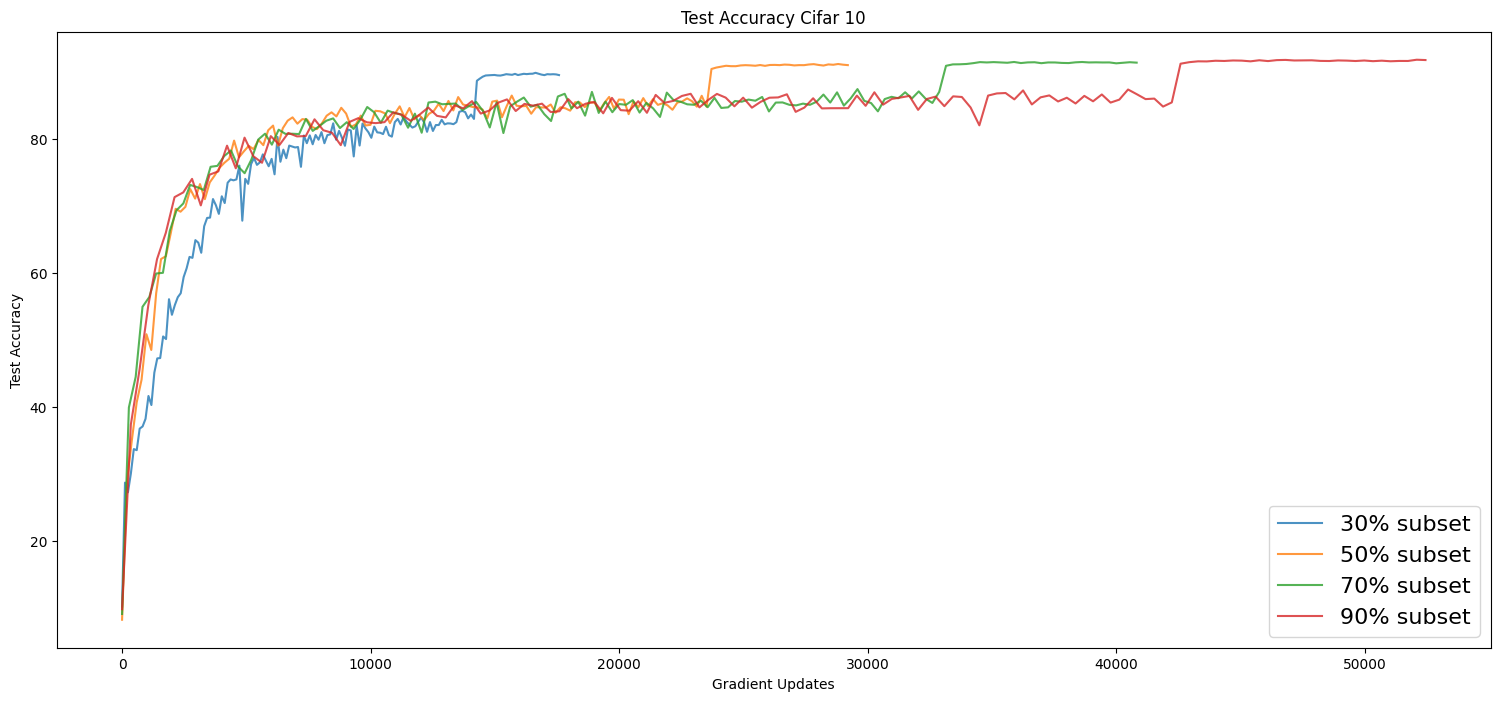

In [105]:
max_epoch = 150

# Test Accuracy
series_list = [
]

for x in c10_vanila_list:
    batch_per_epoch = ceil(50000 * x['subset'] / 128)
    epoch = [x * batch_per_epoch for x in range(max_epoch)]
    series_list.append((epoch, x['test_acc'][:max_epoch], f"{int(x['subset']*100)}% subset"))

plot_series(data=series_list, x_lab="Gradient Updates", y_lab="Test Accuracy",
            title="Test Accuracy Cifar 10", file_name=f"test_acc_vanila", 
            loc="lower right")

In [106]:
for x in c10_vanila_list:
    print(f"Subset: {x['subset']}, Max Acc: {x['test_acc'].max()}")

Subset: 0.3, Max Acc: 89.91666666666667
Subset: 0.5, Max Acc: 91.27666666666666
Subset: 0.7, Max Acc: 91.63666666666666
Subset: 0.9, Max Acc: 91.96


### Average EL2N

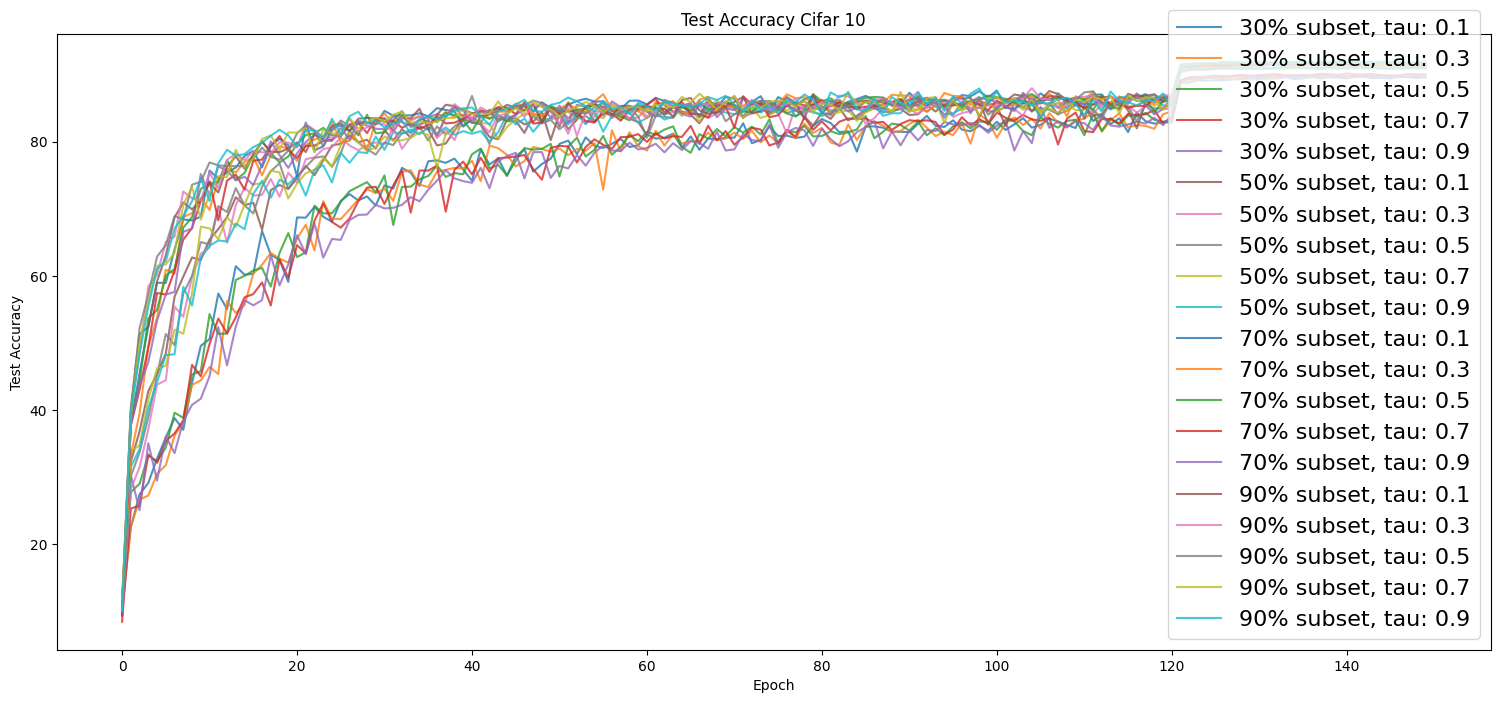

Subset: [0.3, 0.5, 0.7, 0.9], Max Acc: 92.12, Tau: 0.9


In [107]:
# load average runs:

runs = [0, 1, 2]
taus = [0.1, 0.3, 0.5, 0.7, 0.9]
subsets = [0.3,0.5, 0.7, 0.9]
c10_avg_list = []

max_acc = 0
max_tau = 0

for ss in subsets:
    for tau in taus:
        avg_test_acc = []
        for i, run in enumerate(runs):
            data = np.load(f"./tmp/c10_el2n_wt_avg/c10_el2n_wt_avg-{run}-{ss}-{tau}_b128_{run}_tau{tau}.npz")
            avg_test_acc.append(data['test_acc'][0])
        avg_test_acc = np.array(avg_test_acc)
        avg_test_acc = avg_test_acc.mean(axis=0)
        c10_avg_list.append({
            'subset': ss,
            'tau': tau,
            'test_acc':avg_test_acc
        })
        
        if data['test_acc'][0].max() > max_acc:
            max_acc = data['test_acc'][0].max()
            max_tau = tau
        
max_epoch = 150

epoch = [x for x in range(max_epoch)]

# Test Accuracy
series_list = [
]

for x in c10_avg_list:
#     batch_per_epoch = ceil(50000 * x['subset'] / 128)
#     epoch = [x * batch_per_epoch for x in range(max_epoch)]

    series_list.append((epoch, x['test_acc'][:max_epoch], f"{int(x['subset']*100)}% subset, tau: {x['tau']}"))

plot_series(data=series_list, x_lab="Epoch", y_lab="Test Accuracy",
            title="Test Accuracy Cifar 10", file_name=f"test_acc_vanila", 
            loc="lower right")
# c10_avg_list
print(f"Subset: {subsets}, Max Acc: {max_acc}, Tau: {tau}")

### CRAIG Baseline

Subset: 0.3, Max Acc: 85.89333333333333
Subset: 0.5, Max Acc: 89.99000000000001
Subset: 0.7, Max Acc: 90.875
Subset: 0.9, Max Acc: 91.89
Subset: 1, Max Acc: 92.30666666666667


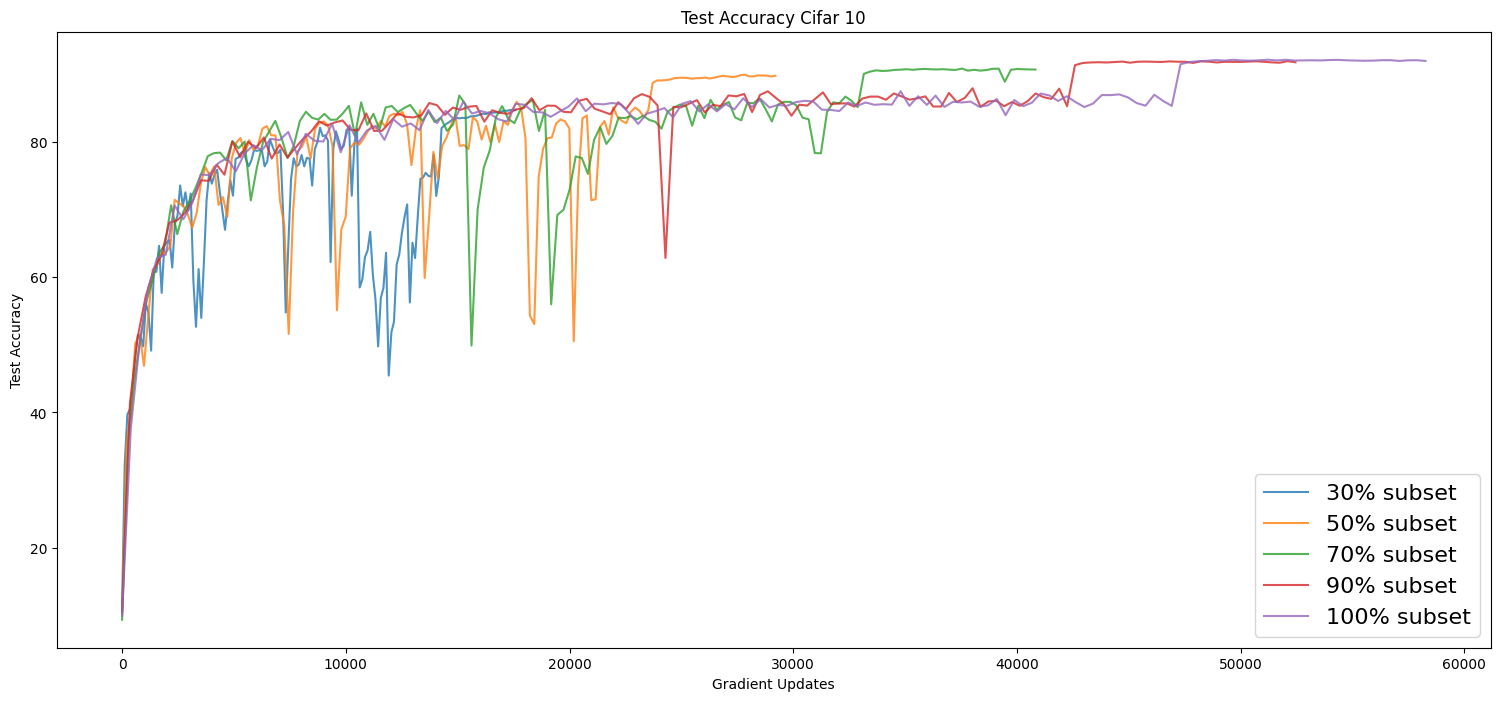

In [108]:
runs = [0, 1, 2]
subsets = [0.3, 0.5, 0.7, 0.9, 1]
c10_craig_list = []

max_acc = 0
max_tau = 0

for ss in subsets:
    avg_test_acc = []
    for i, run in enumerate(runs):
        if ss == 0.5 and run == 2 or ss == 0.7 and run == 0:
            continue
            "c10_craig_baseline-0-0.1-0_b128_0_grd_w_warm_mile_start_0_lag_1_b256_0_False_rp0_el0"
        data = np.load(f"./tmp/c10_craig_baseline/c10_craig_baseline-{run}-{ss}-0_b128_{run}_grd_w_warm_mile_start_0_lag_1_b256_{run}_False_rp0_el0.npz")
        avg_test_acc.append(data['test_acc'][0])
    avg_test_acc = np.array(avg_test_acc)
    avg_test_acc = avg_test_acc.mean(axis=0)
    c10_craig_list.append({
        'subset': ss,
        'tau': tau,
        'test_acc':avg_test_acc
    })

    print(f"Subset: {ss}, Max Acc: {avg_test_acc.max()}")
        
max_epoch = 150

# Test Accuracy
series_list = [
]

for x in c10_craig_list:
    batch_per_epoch = ceil(50000 * x['subset'] / 128)
    epoch = [x * batch_per_epoch for x in range(max_epoch)]
    series_list.append((epoch, x['test_acc'][:max_epoch], f"{int(x['subset']*100)}% subset"))

plot_series(data=series_list, x_lab="Gradient Updates", y_lab="Test Accuracy",
            title="Test Accuracy Cifar 10", file_name=f"test_acc_vanila", 
            loc="lower right")

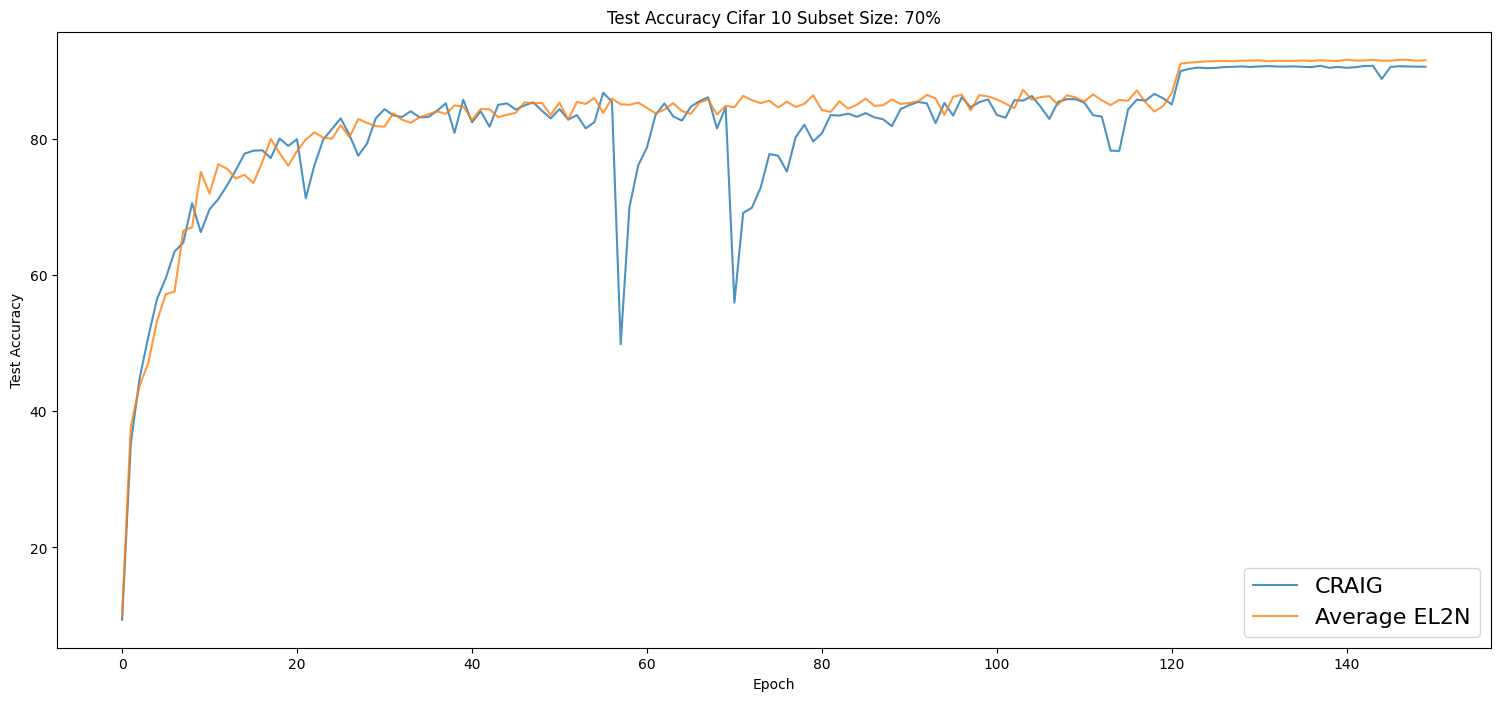

In [123]:
ss = 0.7
tau = 0.9
max_epoch = 150

craig_acc = None
for x in c10_craig_list:
    if x["subset"] == ss:
        craig_acc = x["test_acc"]
        
el2n_avg_acc = None
for x in c10_avg_list:
    if x["subset"] == ss and x["tau"] == tau:
        el2n_avg_acc = x["test_acc"]

epoch = [x for x in range(max_epoch)]

series_list = [
    (epoch, craig_acc[:max_epoch], f"CRAIG"),
    (epoch, el2n_avg_acc[:max_epoch], f"Average EL2N"),
]


plot_series(data=series_list, x_lab="Epoch", y_lab="Test Accuracy",
            title=f"Test Accuracy Cifar 10 Subset Size: {int(ss*100)}%", file_name=f"craig_vs_el2n_ss{ss}", 
            loc="lower right")
        

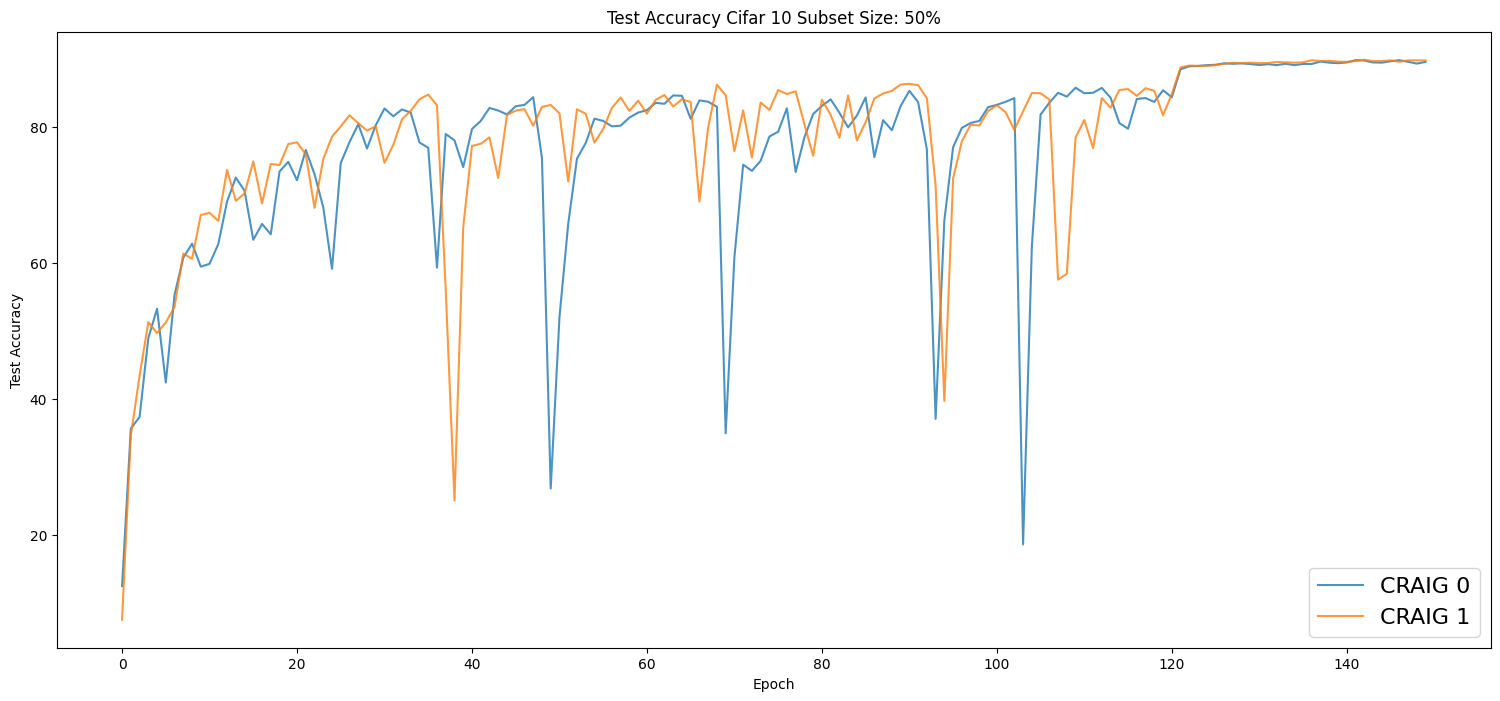

In [120]:
ss = 0.5
max_epoch = 150

craig_acc_0 = np.load(f"./tmp/c10_craig_baseline/c10_craig_baseline-{0}-{ss}-0_b128_{0}_grd_w_warm_mile_start_0_lag_1_b256_{0}_False_rp0_el0.npz")
craig_acc_1 = np.load(f"./tmp/c10_craig_baseline/c10_craig_baseline-{1}-{ss}-0_b128_{1}_grd_w_warm_mile_start_0_lag_1_b256_{1}_False_rp0_el0.npz")
craig_acc_2 = np.load(f"./tmp/c10_craig_baseline/c10_craig_baseline-{2}-{ss}-0_b128_{2}_grd_w_warm_mile_start_0_lag_1_b256_{2}_False_rp0_el0.npz")

craig_acc_0 = craig_acc_0['test_acc'][0]
craig_acc_1 = craig_acc_1['test_acc'][0]
craig_acc_2 = craig_acc_2['test_acc'][0]


epoch = [x for x in range(max_epoch)]

series_list = [
    (epoch, craig_acc_0[:max_epoch], f"CRAIG 0"),
    (epoch, craig_acc_1[:max_epoch], f"CRAIG 1"),
#     (epoch, craig_acc_2[:max_epoch], f"CRAIG 2"),
]


plot_series(data=series_list, x_lab="Epoch", y_lab="Test Accuracy",
            title=f"Test Accuracy Cifar 10 Subset Size: {int(ss*100)}%", file_name=f"craig_each_run{ss}", 
            loc="lower right")

### Compare with full dataset

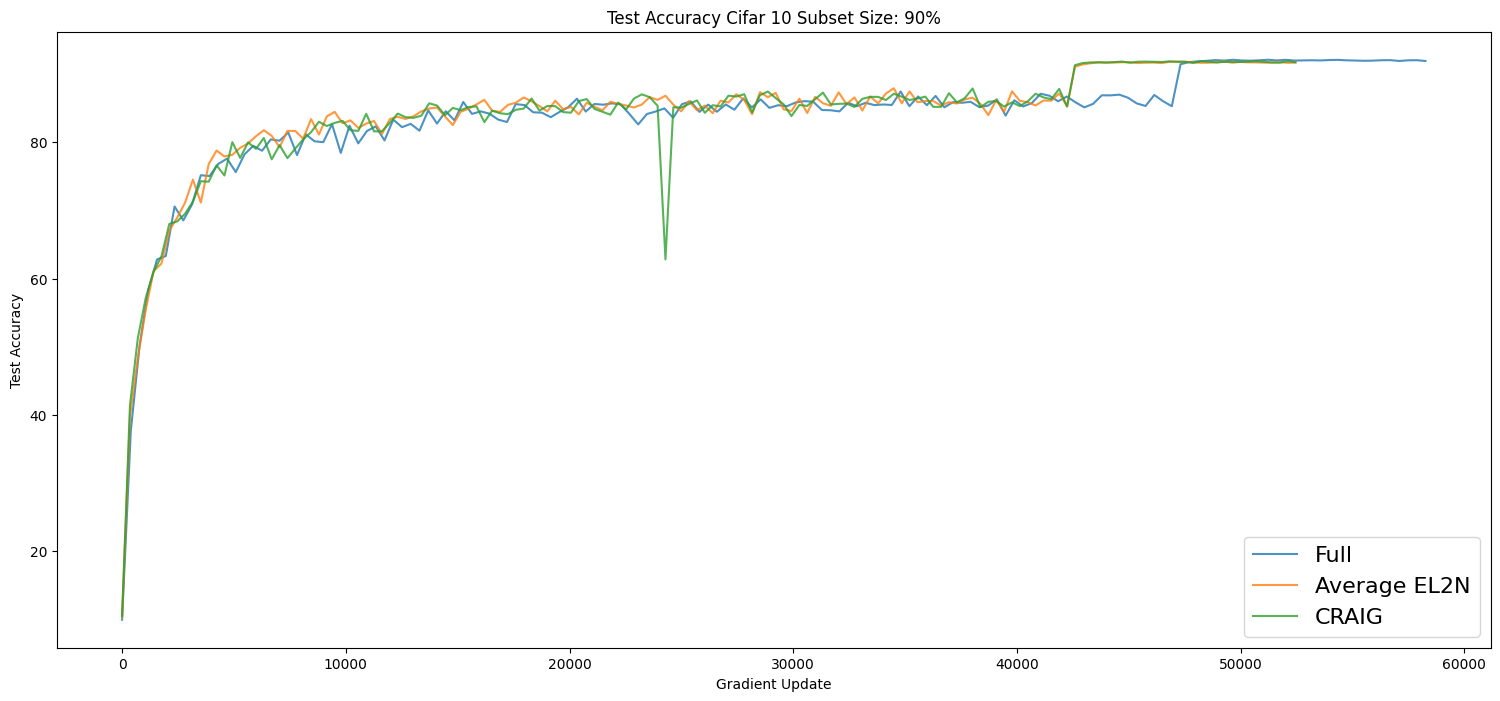

In [138]:
ss = 0.9
tau = 0.9
max_epoch = 150

full_acc = None
for x in c10_craig_list:
    if x["subset"] == 1:
        full_acc = x["test_acc"]
        
craig_acc = None
for x in c10_craig_list:
    if x["subset"] == ss:
        craig_acc = x["test_acc"]
        
el2n_avg_acc = None
for x in c10_avg_list:
    if x["subset"] == ss and x["tau"] == tau:
        el2n_avg_acc = x["test_acc"]

# epoch = [x for x in range(max_epoch)]
batch_per_epoch_ss = ceil(50000 * ss / 128)
epoch_ss = [x * batch_per_epoch_ss for x in range(max_epoch)]
batch_per_epoch_fl = ceil(50000 * 1 / 128)
epoch_fl = [x * batch_per_epoch_fl for x in range(max_epoch)]


series_list = [
    (epoch_fl, full_acc[:max_epoch], f"Full"),
    (epoch_ss, el2n_avg_acc[:max_epoch], f"Average EL2N"),
    (epoch_ss, craig_acc[:max_epoch], f"CRAIG"),
]


plot_series(data=series_list, x_lab="Gradient Update", y_lab="Test Accuracy",
            title=f"Test Accuracy Cifar 10 Subset Size: {int(ss*100)}%", file_name=f"full_vs_el2n_ss{ss}", 
            loc="lower right")